<a href="https://colab.research.google.com/github/CarlosGuarneros/Actividadades-TDAW/blob/main/Practica_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 1.3 (Transformada de Hough y Etiquetado de componentes conectados)**

In [ ]:
!pip install anytree

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from anytree import Node, RenderTree

Raiz
├── Padre: 100
│   ├── Union: 1
│   ├── Union: 2
│   ├── Union: 3
│   ├── Union: 4
│   ├── Union: 5
│   ├── Union: 6
│   ├── Union: 7
│   ├── Union: 8
│   ├── Union: 9
│   ├── Union: 10
│   ├── Union: 11
│   ├── Union: 12
│   ├── Union: 13
│   ├── Union: 14
│   ├── Union: 15
│   ├── Union: 16
│   ├── Union: 17
│   ├── Union: 18
│   ├── Union: 19
│   ├── Union: 20
│   ├── Union: 21
│   ├── Union: 22
│   ├── Union: 23
│   ├── Union: 24
│   ├── Union: 25
│   ├── Union: 26
│   ├── Union: 27
│   ├── Union: 28
│   ├── Union: 29
│   ├── Union: 30
│   ├── Union: 31
│   ├── Union: 32
│   ├── Union: 33
│   ├── Union: 34
│   ├── Union: 35
│   ├── Union: 36
│   ├── Union: 37
│   ├── Union: 38
│   ├── Union: 39
│   ├── Union: 40
│   ├── Union: 41
│   ├── Union: 42
│   ├── Union: 43
│   ├── Union: 44
│   ├── Union: 45
│   ├── Union: 46
│   ├── Union: 47
│   ├── Union: 48
│   ├── Union: 49
│   ├── Union: 50
│   ├── Union: 51
│   ├── Union: 52
│   ├── Union: 53
│   ├── Union: 54
│   ├── Union: 55

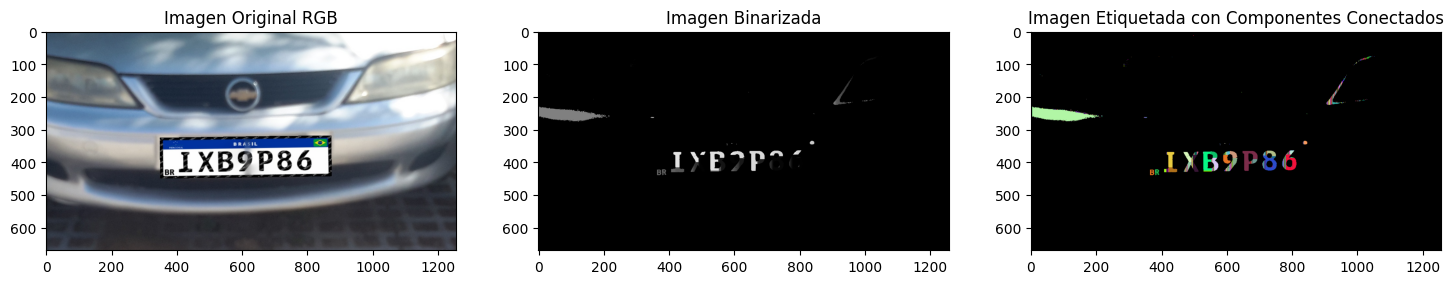

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from anytree import Node, RenderTree


def find(parent, i):
    if parent[i] == -1:
        return i
    return find(parent, parent[i])

def union(parent, x, y):
    x_set = find(parent, x)
    y_set = find(parent, y)
    if x_set != y_set:
        parent[x_set] = y_set

def build_component_tree(imagen_binarizada):
    height, width = imagen_binarizada.shape
    parent = [-1] * (height * width)
    component_colors = {}

    component_count = 0

    for y in range(height):
        for x in range(width):
            if imagen_binarizada[y, x] == 255:
                neighbors = []
                if x > 0:
                    neighbors.append((y, x - 1))
                if y > 0:
                    neighbors.append((y - 1, x))

                if not neighbors:
                    component_count += 1
                    component_colors[component_count] = np.random.randint(0, 256, 3)
                    imagen_binarizada[y, x] = component_count

                else:
                    neighbor_labels = []
                    for neighbor_y, neighbor_x in neighbors:
                        neighbor_label = imagen_binarizada[neighbor_y, neighbor_x]
                        if neighbor_label != 0:
                            neighbor_labels.append(neighbor_label)

                    if not neighbor_labels:
                        component_count += 1
                        component_colors[component_count] = np.random.randint(0, 256, 3)
                        imagen_binarizada[y, x] = component_count
                    else:
                        min_label = min(neighbor_labels)
                        imagen_binarizada[y, x] = min_label
                        for label in neighbor_labels:
                            if label != min_label:
                                union(parent, label, min_label)

    # Crear nodos solo para las etiquetas presentes en la imagen
    component_nodes = {}
    root = Node("Raiz")
    for i in range(1, component_count + 1):
        if np.any(imagen_binarizada == i):
            parent_label = find(parent, i)
            if parent_label not in component_nodes:
                component_nodes[parent_label] = Node(f'Padre: {parent_label}', parent=root)
            if i != parent_label:
                parent_node = component_nodes[parent_label]
                component_nodes[i] = Node(f'Union: {i}', parent=parent_node)

    return root, component_nodes

def print_component_tree(root):
    for pre, _, node in RenderTree(root):
        print(f"{pre}{node.name}")

def label_connected_components(image_path):
    imagen = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Leer la imagen en formato RGB
    imagen_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises
    _, imagen_binarizada1 = cv2.threshold(imagen_gray, 20, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(imagen_binarizada1)

    tamano_maximo = 10000

    for label in range(1, num_labels):
        if stats[label, cv2.CC_STAT_AREA] > tamano_maximo:
            labels[labels == label] = 0

    imagen_binarizada = np.where(labels > 0, 255, 0).astype(np.uint8)

    component_tree, component_nodes = build_component_tree(imagen_binarizada)

    # Imprimir los componentes conectados en la consola
    print_component_tree(component_tree)

    # Crear una imagen en blanco del mismo tamaño
    colored_image = np.zeros((imagen_binarizada.shape[0], imagen_binarizada.shape[1], 3), dtype=np.uint8)

    # Asignar colores a los componentes en la imagen original
    for i in range(1, len(component_nodes) + 1):
        if i in component_nodes:
            mask = (imagen_binarizada == i)
            colored_image[mask] = np.random.randint(0, 256, 3)

    # Mostrar las imágenes en tres subplots
    plt.figure(figsize=(18, 6))

    # Subplot 1: Imagen original RGB
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original RGB')

    # Subplot 2: Imagen binarizada
    plt.subplot(1, 3, 2)
    plt.imshow(imagen_binarizada, cmap='gray')
    plt.title('Imagen Binarizada')

    # Subplot 3: Imagen etiquetada con componentes conectados
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Etiquetada con Componentes Conectados')

    plt.show()

image_path = 'placas/103.JPG'
label_connected_components(image_path)


# Práctica 1.3 (Transformada de Hough y Etiquetado de componentes conectados)

Ponemos las librerias necesarias

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
imagen = cv2.imread('uno.jpg', cv2.IMREAD_COLOR)  # Leer la imagen en formato RGB

# Convertir la imagen original a escala de grises
imagen_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Aplicar la binarización de Otsu con umbralización
_, imagen_binarizada1 = cv2.threshold(imagen_gray, 20, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Aplicar el algoritmo de etiquetado de componentes conectados
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(imagen_binarizada1)

tamano_maximo = 10000

for label in range(1, num_labels):
    if stats[label, cv2.CC_STAT_AREA] > tamano_maximo:
        labels[labels == label] = 0

imagen_binarizada = np.where(labels > 0, 255, 0).astype(np.uint8)

# Crear una figura con dos subplots para mostrar ambas imágenes
plt.figure(figsize=(12, 6))

# Subplot para la imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Subplot para la imagen binarizada invertida
plt.subplot(1, 2, 2)
plt.imshow(imagen_binarizada, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

Desarrollamos Canny

In [ ]:
# Función para aplicar Canny
def canny_edge_detection(image, low_threshold, high_threshold):
    # Convertir la imagen a escala de grises
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar el filtro de Sobel para encontrar gradientes en la imagen
    sobel_x = cv2.Sobel(grayscale_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(grayscale_image, cv2.CV_64F, 0, 1, ksize=3)

    # Calcular la magnitud del gradiente
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Calcular la dirección del gradiente
    gradient_direction = np.arctan2(sobel_y, sobel_x)

    # Aplicar la supresión de no máximos
    suppressed_gradient = np.zeros_like(gradient_magnitude)
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            angle = gradient_direction[i, j]
            if (angle >= 0 and angle <= np.pi / 4) or (angle >= 7 * np.pi / 4 and angle <= 2 * np.pi):
                if (gradient_magnitude[i, j] >= gradient_magnitude[i, j - 1] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i, j + 1]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]
            elif (angle >= np.pi / 4 and angle <= 3 * np.pi / 4):
                if (gradient_magnitude[i, j] >= gradient_magnitude[i - 1, j - 1] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i + 1, j + 1]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]
            elif (angle >= 3 * np.pi / 4 and angle <= 5 * np.pi / 4):
                if (gradient_magnitude[i, j] >= gradient_magnitude[i - 1, j] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i + 1, j]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]
            else:
                if (gradient_magnitude[i, j] >= gradient_magnitude[i - 1, j + 1] and
                    gradient_magnitude[i, j] >= gradient_magnitude[i + 1, j - 1]):
                    suppressed_gradient[i, j] = gradient_magnitude[i, j]

    # Aplicar la binarización con histéresis (Canny)
    high_threshold = np.max(suppressed_gradient) * high_threshold
    low_threshold = high_threshold * low_threshold

    # Crear una imagen de bordes final
    edge_image = np.zeros_like(suppressed_gradient, dtype=np.uint8)
    strong_edge_i, strong_edge_j = np.where(suppressed_gradient >= high_threshold)
    weak_edge_i, weak_edge_j = np.where((suppressed_gradient >= low_threshold) &
                                        (suppressed_gradient < high_threshold))

    edge_image[strong_edge_i, strong_edge_j] = 255
    edge_image[weak_edge_i, weak_edge_j] = 50  # Valor intermedio para bordes débiles

    return edge_image

Desarrollamos la Transformada de Hough

In [ ]:
# Función para aplicar la Transformada de Hough
def hough_transform(edge_image, theta_resolution=1, rho_resolution=1):
    height, width = edge_image.shape
    max_rho = int(np.sqrt(height**2 + width**2))

    # Rango de valores de theta
    thetas = np.deg2rad(np.arange(-90, 90, theta_resolution))

    # Matriz acumuladora para la Transformada de Hough
    accumulator = np.zeros((2 * max_rho, len(thetas)), dtype=np.uint64)

    # Obtener las coordenadas de los bordes detectados
    edge_coordinates = np.argwhere(edge_image > 0)

    for i in range(len(edge_coordinates)):
        y, x = edge_coordinates[i]
        for t_index in range(len(thetas)):
            rho = int(x * np.cos(thetas[t_index]) + y * np.sin(thetas[t_index]))
            rho_index = rho + max_rho
            accumulator[rho_index, t_index] += 1

    return accumulator, thetas

Cargamos la imagen

In [ ]:
# Cargar la imagen
image = cv2.imread('um_000002.png')

Aplicamos Canny a la imagen

In [ ]:
# Aplicar Canny para detectar bordes
canny_image = canny_edge_detection(image, low_threshold=0.1, high_threshold=0.3)

# Mostrar la imagen con bordes detectados
cv2_imshow(canny_image)

Aplicamos Hough

In [ ]:
# Aplicar la Transformada de Hough para detectar líneas rectas
lines = hough_transform(canny_image, theta_resolution=1, rho_resolution=1, threshold=100)

# Dibujar las líneas detectadas en la imagen original
if lines is not None:
    for line in lines:
        rho, theta = line
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        # Dibujar la línea en la matriz de la imagen
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Mostrar la imagen con las líneas detectadas
cv2_imshow(image)
